# 準備

In [1]:
import warnings
warnings.simplefilter('ignore')

# ライブラリのインポート
import pickle as pkl
import pandas as pd
from sklearn.metrics import accuracy_score
from IPython.display import Image
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.util.logger import _INFO

In [2]:
# データ、モデルの読み込み
train = pd.read_csv('train_proc.csv')
with open('lgbm_model.pkl', 'rb') as f:
    model = pkl.load(f)
train_X, train_y = train.drop(columns='Survived'), train['Survived']
train_pred = model.predict(train_X)

# 決定木代理モデルの出力

In [3]:
interpreter = Interpretation(train_X, feature_names=model.feature_name_)
model_inst = InMemoryModel(model.predict, examples=train_X,
                           model_type='classifier', unique_values=[0, 1],
                           feature_names=model.feature_name_, 
                           target_names=['Not Survived','Survived'], 
                           log_level=_INFO)
surrogate_explainer = interpreter.tree_surrogate(oracle=model_inst, seed=42, max_depth=3)
surrogate_explainer.fit(train_X, train_y, use_oracle=True, prune='post',scorer_type='default')

2021-02-09 00:53:24,399 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2021-02-09 00:53:24,410 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used f1-score
2021-02-09 00:53:24,413 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 0.9174352209977852
2021-02-09 00:53:24,432 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [2, 5, 8, 9, 12]
2021-02-09 00:53:24,435 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (711,)
2021-02-09 00:53:24,439 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.907; oracle score 0.871


-0.036

In [4]:
# 忠実度の計算（LightGBMモデルの予測結果に対するAccuracy）
accuracy_score(train_pred, surrogate_explainer.predict(train_X))

0.9085794655414908

In [5]:
# 決定木代理モデルの描画
surrogate_explainer.plot_global_decisions(colors=['coral','lightsteelblue','darkkhaki'],
                                          file_name='titanic_skater_tree.png')

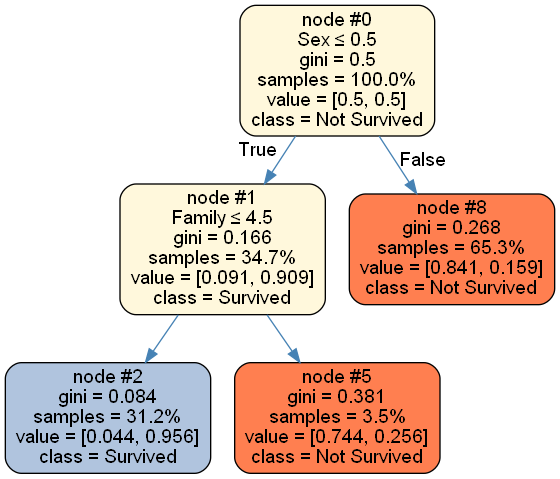

In [6]:
Image('titanic_skater_tree.png')

# scikit-learnの決定木による代理モデル生成

In [7]:
# ライブラリのインポート
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

In [8]:
# 決定木によるLightGBMモデルの予測結果の学習
tree = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.0)
tree.fit(train_X, train_pred)
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=model.feature_name_, 
                           class_names=['Not Survived','Survived'])

In [9]:
# 忠実度の計算
tree.score(train_X, train_pred)

0.9367088607594937

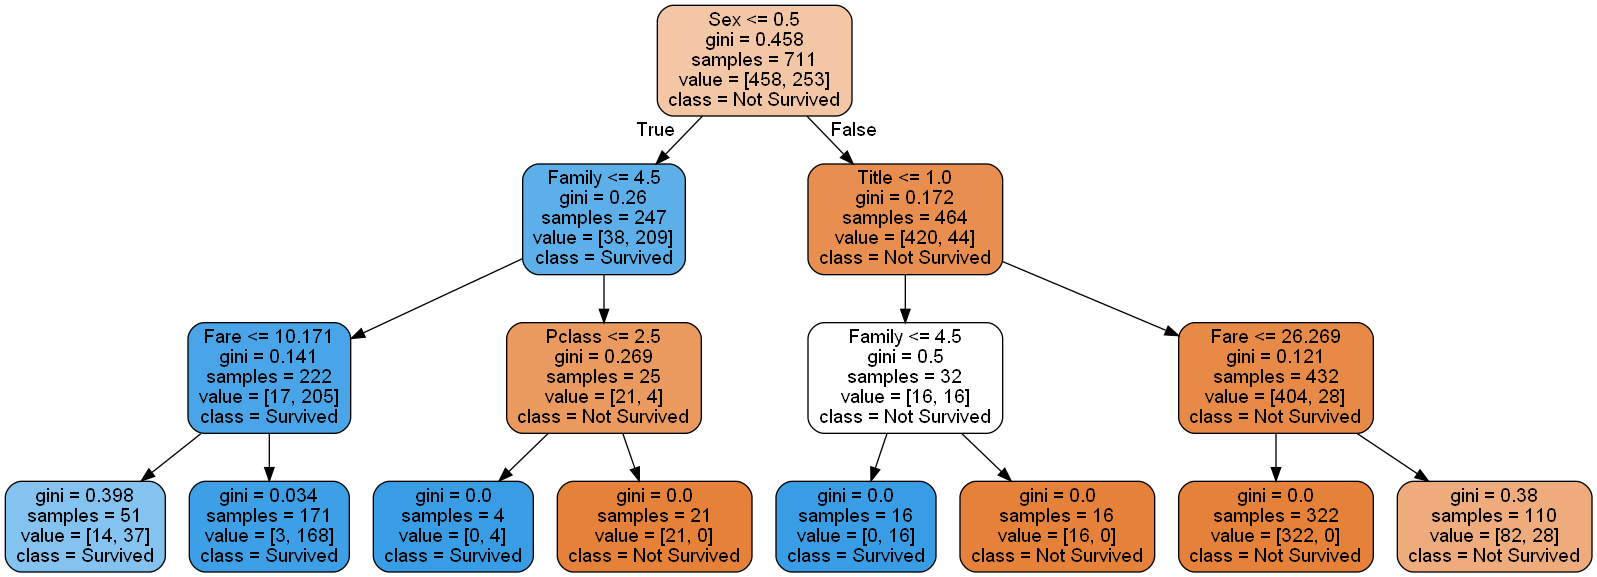

In [10]:
# 決定木の描画
pydotplus.graph_from_dot_data(dot_data).write_png('titanic_sklearn_tree_ccpalpha=0.00(default).png')
Image('titanic_sklearn_tree_ccpalpha=0.00(default).png')

● ccp_alpha=0.01で実行

In [11]:
# 決定木によるLightGBMモデルの予測結果の学習
tree = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01)
tree.fit(train_X, train_pred)
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=model.feature_name_, 
                           class_names=['Not Survived','Survived'])

In [12]:
# 忠実度の計算
tree.score(train_X, train_pred)

0.9310829817158931

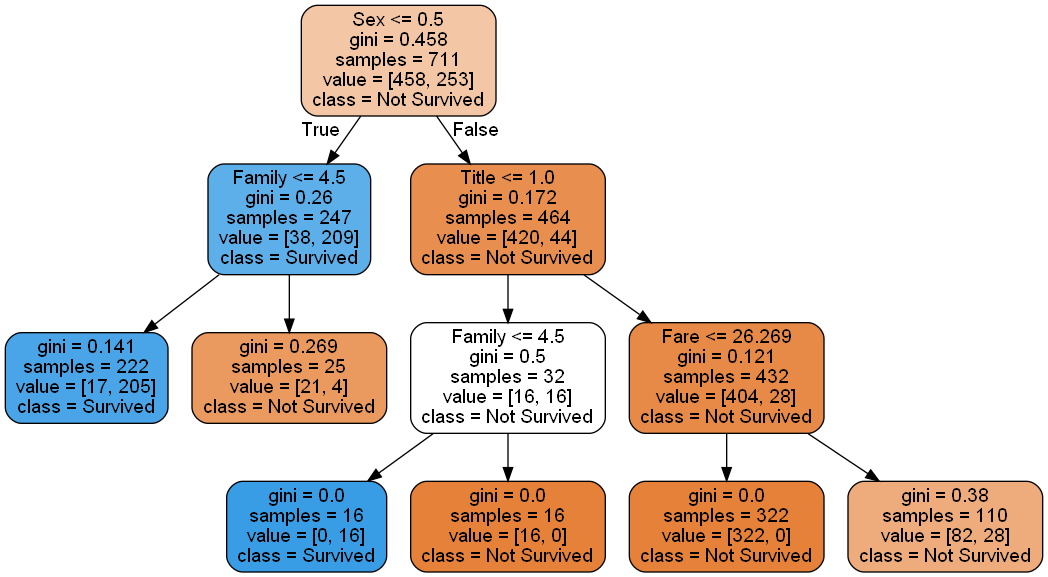

In [13]:
# 決定木の描画
pydotplus.graph_from_dot_data(dot_data).write_png('titanic_sklearn_tree_ccpalpha=0.01.png')
Image('titanic_sklearn_tree_ccpalpha=0.01.png')

● ccp_alpha=0.1で実行

In [14]:
# 決定木によるLightGBMモデルの予測結果の学習
tree = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.1)
tree.fit(train_X, train_pred)
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=model.feature_name_, 
                           class_names=['Not Survived','Survived'])

In [15]:
# 忠実度の計算
tree.score(train_X, train_pred)

0.8846694796061885

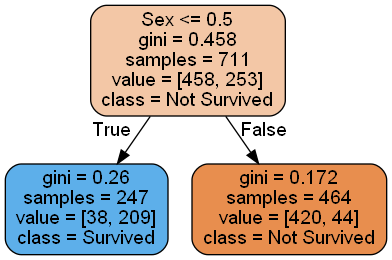

In [16]:
# 決定木の描画
pydotplus.graph_from_dot_data(dot_data).write_png('titanic_sklearn_tree_ccpalpha=0.1.png')
Image('titanic_sklearn_tree_ccpalpha=0.1.png')